In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Make plots look clean
plt.style.use('seaborn-v0_8')


In [20]:
# Number of time steps
N = 10000  

# Healthy vibration – low amplitude, smooth oscillation
vibration_healthy = 0.3 + 0.05 * np.sin(np.linspace(0, 40*np.pi, N)) + 0.02 * np.random.randn(N)

# Healthy temperature – stable around 40°C
temperature_healthy = 40 + 0.5 * np.random.randn(N)

# Healthy pressure – slight fluctuations around 100 units
pressure_healthy = 100 + 1.5 * np.random.randn(N)

# Healthy torque – mostly stable
torque_healthy = 50 + 0.8 * np.random.randn(N)

# Healthy motor current – tiny noise around baseline
current_healthy = 10 + 0.2 * np.random.randn(N)

# Healthy RPM – stable rotation speed
rpm_healthy = 1500 + 3 * np.random.randn(N)

print("Healthy signals generated!")


Healthy signals generated!


In [21]:
# Create degradation factor (slow increase from 0 to a higher value)
degradation = np.linspace(0, 1.5, N)

# Apply degradation to the sensors
vibration_degraded = vibration_healthy + 0.1 * degradation
temperature_degraded = temperature_healthy + 0.05 * degradation
pressure_degraded = pressure_healthy + 0.3 * degradation
torque_degraded = torque_healthy + 0.2 * degradation
current_degraded = current_healthy + 0.05 * degradation
rpm_degraded = rpm_healthy - 5 * degradation  # RPM slightly decreases

print("Degradation signals generated!")


Degradation signals generated!


In [22]:
# Create a slow linear drift for degradation
drift = np.linspace(0, 0.5, N)   # 0 → 0.5 increase over time

# Degraded vibration – higher amplitude + drift
vibration_degraded = vibration_healthy + 0.3 * drift

# Degraded temperature – slow rise
temperature_degraded = temperature_healthy + 5 * drift

# Degraded pressure – more instability
pressure_degraded = pressure_healthy + 2 * drift + 0.5 * np.random.randn(N)

# Degraded torque – becomes unstable
torque_degraded = torque_healthy + 0.5 * drift

# Degraded current – rises slightly
current_degraded = current_healthy + 0.2 * drift

# Degraded RPM – slightly unstable
rpm_degraded = rpm_healthy + 10 * drift

print("Degradation signals created!")


Degradation signals created!


In [6]:
# Copy degraded signals to modify
vibration_failure = vibration_degraded.copy()
temperature_failure = temperature_degraded.copy()
pressure_failure = pressure_degraded.copy()
torque_failure = torque_degraded.copy()
current_failure = current_degraded.copy()
rpm_failure = rpm_degraded.copy()

# Choose spike locations (random)
num_spikes = 25
spike_indices = np.random.randint(1000, N-1000, num_spikes)

# Add failure spikes- large amplitude jumps
for i in spike_indices:
    vibration_failure[i:i+50] += np.random.uniform(1.0, 2.0) * np.sin(np.linspace(0, 3*np.pi, 50))
    temperature_failure[i:i+50] += np.random.uniform(5, 10)
    pressure_failure[i:i+50] += np.random.uniform(10, 20)
    torque_failure[i:i+50] += np.random.uniform(3, 6)
    current_failure[i:i+50] += np.random.uniform(1, 3)
    rpm_failure[i:i+50] += np.random.uniform(30, 80)

print("Failure spikes added!")


Failure spikes added!


In [5]:
# Create failure spikes (sudden strong jumps)
spikes = np.zeros(N)
spike_positions = np.random.choice(np.arange(2000, N), size=40, replace=False)  # 40 random spikes
spikes[spike_positions] = np.random.uniform(2, 5, size=40)  # spike amplitude

# Failure vibration – strongest indicator of failure
vibration_failure = vibration_degraded + spikes + 0.5 * np.random.randn(N)

# Failure temperature – overheating patterns
temperature_failure = temperature_degraded + np.random.uniform(5, 15, N)

# Failure pressure – chaotic fluctuations
pressure_failure = pressure_degraded + 2 * np.random.randn(N)

# Failure torque – unstable
torque_failure = torque_degraded + 1.5 * np.random.randn(N)

# Failure current – unstable current draw
current_failure = current_degraded + 0.8 * np.random.randn(N)

# Failure RPM – fluctuates heavily
rpm_failure = rpm_degraded + 20 * np.random.randn(N)

print("Failure signals generated!")


Failure signals generated!


In [6]:
# Split points
healthy_len = 4000
degraded_len = 3000
failure_len = 3000

# Combine vibration
vibration = np.concatenate([
    vibration_healthy[:healthy_len],
    vibration_degraded[healthy_len:healthy_len+degraded_len],
    vibration_failure[healthy_len+degraded_len:healthy_len+degraded_len+failure_len]
])

# Combine temperature
temperature = np.concatenate([
    temperature_healthy[:healthy_len],
    temperature_degraded[healthy_len:healthy_len+degraded_len],
    temperature_failure[healthy_len+degraded_len:healthy_len+degraded_len+failure_len]
])

# Combine pressure
pressure = np.concatenate([
    pressure_healthy[:healthy_len],
    pressure_degraded[healthy_len:healthy_len+degraded_len],
    pressure_failure[healthy_len+degraded_len:healthy_len+degraded_len+failure_len]
])

# Combine torque
torque = np.concatenate([
    torque_healthy[:healthy_len],
    torque_degraded[healthy_len:healthy_len+degraded_len],
    torque_failure[healthy_len+degraded_len:healthy_len+degraded_len+failure_len]
])

# Combine current
current = np.concatenate([
    current_healthy[:healthy_len],
    current_degraded[healthy_len:healthy_len+degraded_len],
    current_failure[healthy_len+degraded_len:healthy_len+degraded_len+failure_len]
])

# Combine RPM
rpm = np.concatenate([
    rpm_healthy[:healthy_len],
    rpm_degraded[healthy_len:healthy_len+degraded_len],
    rpm_failure[healthy_len+degraded_len:healthy_len+degraded_len+failure_len]
])

print("Full machine timeline created!")


Full machine timeline created!


In [7]:
# Create final DataFrame
df = pd.DataFrame({
    "vibration": vibration,
    "temperature": temperature,
    "pressure": pressure,
    "torque": torque,
    "current": current,
    "rpm": rpm
})

# Add a time column
df["time"] = np.arange(len(df))

# Save raw data
save_path = "../data/raw/multisensor_data.csv"
df.to_csv(save_path, index=False)

print(f"Saved dataset to {save_path}")
df.head()


Saved dataset to ../data/raw/multisensor_data.csv


,vibration,temperature,pressure,torque,current,rpm,time
0,0.267801,40.386572,98.539032,49.222044,9.770518,1499.295226,0
1,0.359893,40.455069,98.492908,49.736141,9.703216,1497.984546,1
2,0.304508,39.466202,100.492843,48.858534,9.916237,1499.796474,2
3,0.310607,39.575341,97.636166,50.644588,9.743683,1503.658847,3
4,0.301429,40.829007,100.976593,50.151828,10.249024,1506.212530,4


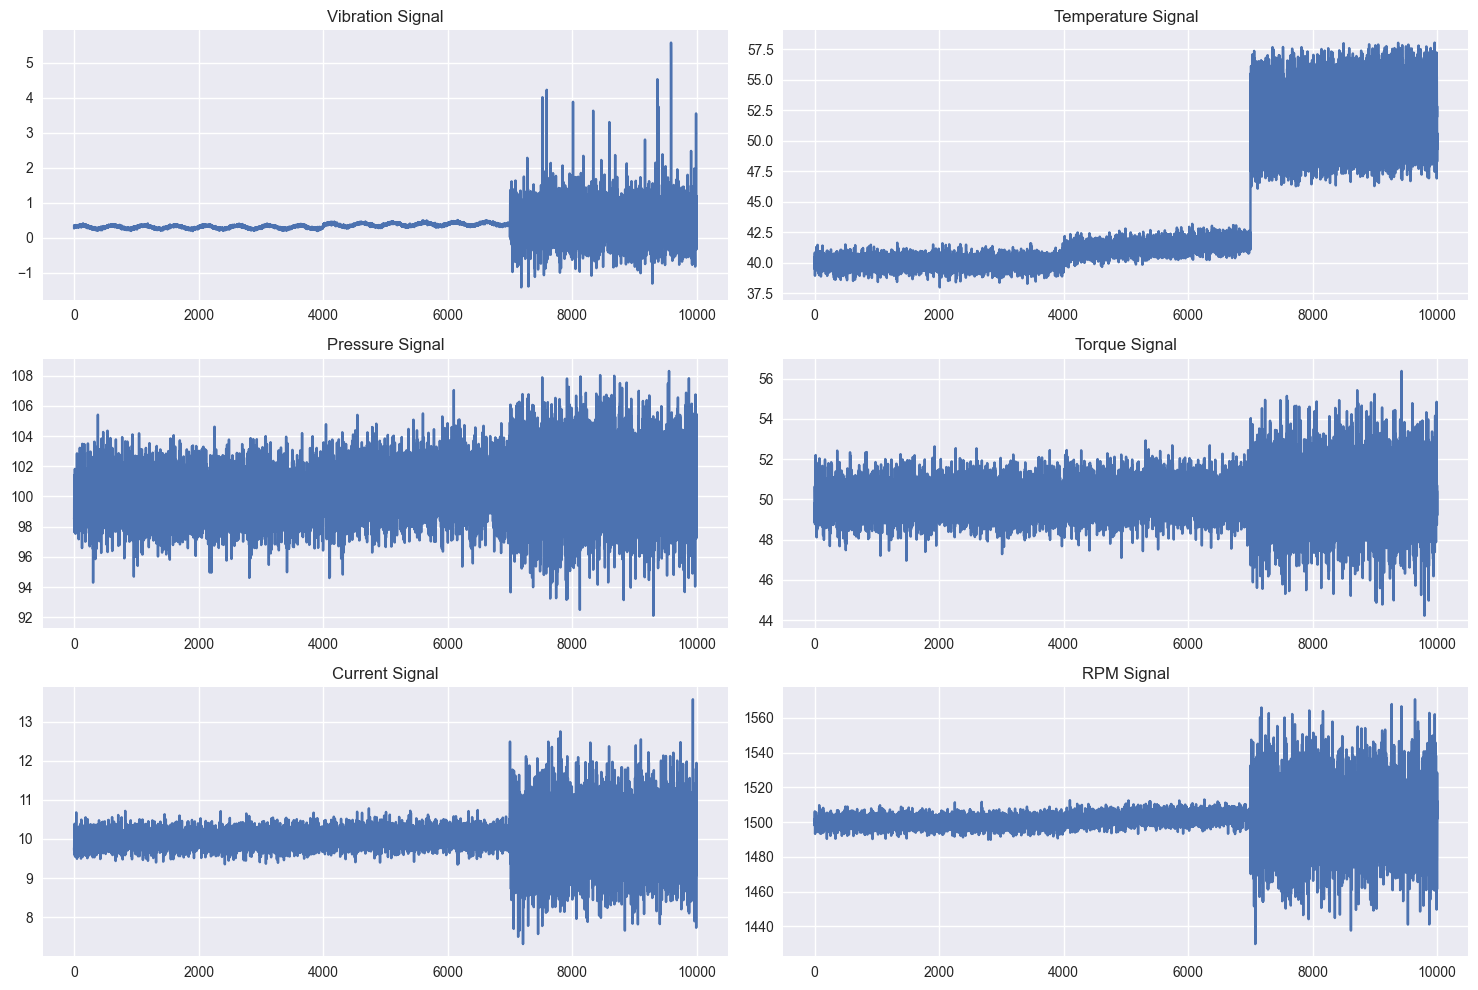

In [8]:
plt.figure(figsize=(15, 10))

plt.subplot(3, 2, 1)
plt.plot(df["vibration"])
plt.title("Vibration Signal")

plt.subplot(3, 2, 2)
plt.plot(df["temperature"])
plt.title("Temperature Signal")

plt.subplot(3, 2, 3)
plt.plot(df["pressure"])
plt.title("Pressure Signal")

plt.subplot(3, 2, 4)
plt.plot(df["torque"])
plt.title("Torque Signal")

plt.subplot(3, 2, 5)
plt.plot(df["current"])
plt.title("Current Signal")

plt.subplot(3, 2, 6)
plt.plot(df["rpm"])
plt.title("RPM Signal")

plt.tight_layout()
plt.show()


In [9]:
# Convert DataFrame to numpy array
data = df[['vibration', 'temperature', 'pressure', 'torque', 'current', 'rpm']].values

# Choose window size (typical: 100 timesteps)
WINDOW_SIZE = 100

print("Data shape:", data.shape)
print("Window size:", WINDOW_SIZE)


Data shape: (10000, 6)
Window size: 100


In [10]:
def create_windows(data, window_size=100):
    X = []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
    return np.array(X)

X = create_windows(data, WINDOW_SIZE)

print("Windowed data shape:", X.shape)


Windowed data shape: (9900, 100, 6)


In [11]:
# RUL decreases as time moves toward failure
y_rul = np.arange(len(X))[::-1]  # reverse from max → 0

print("RUL labels shape:", y_rul.shape)
print("First RUL values:", y_rul[:5])
print("Last RUL values:", y_rul[-5:])


RUL labels shape: (9900,)
First RUL values: [9899 9898 9897 9896 9895]
Last RUL values: [4 3 2 1 0]


In [12]:
failure_label = np.zeros(len(X))
failure_start = int(0.8 * len(X))

# Mark failure region as 1
failure_label[failure_start:] = 1

print("Failure label shape:", failure_label.shape)
print("Healthy samples:", np.sum(failure_label == 0))
print("Failure samples:", np.sum(failure_label == 1))


Failure label shape: (9900,)
Healthy samples: 7920
Failure samples: 1980


In [13]:
# Create failure labels: 0 = normal, 1 = failure
failure_labels = np.zeros(len(X))

# Last 20% of timeline is failure region
failure_start = int(len(X) * 0.8)
failure_labels[failure_start:] = 1

print("Failure labels shape:", failure_labels.shape)
print("Unique values:", np.unique(failure_labels, return_counts=True))


Failure labels shape: (9900,)
Unique values: (array([0., 1.]), array([7920, 1980], dtype=int64))


In [14]:
# Compute min and max per sensor (axis=0 means per feature)
data_min = X.min(axis=(0,1))
data_max = X.max(axis=(0,1))

print("Min values:", data_min)
print("Max values:", data_max)


Min values: [-1.41783704e+00  3.79736248e+01  9.20989797e+01  4.42223704e+01
  7.31466783e+00  1.42986322e+03]
Max values: [   5.57423385   58.05160967  108.31329838   56.3792535    13.56751224
 1570.6838719 ]


In [15]:
# Normalize: (X - min) / (max - min)
X_norm = (X - data_min) / (data_max - data_min)

print("Normalized X shape:", X_norm.shape)
print("Example values:", X_norm[0][0])


Normalized X shape: (9900, 100, 6)
Example values: [0.24107851 0.12017878 0.39718305 0.4112628  0.39275721 0.49305273]


In [29]:
#Autoencoder (Unsupervised Anomaly Detection)
import tensorflow as tf
from tensorflow.keras import layers, models

# Autoencoder model
def build_autoencoder(window_size=100, features=6, latent_dim=32):
    inputs = layers.Input(shape=(window_size, features))
    
    # Encoder
    x = layers.Flatten()(inputs)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(64, activation='relu')(x)
    bottleneck = layers.Dense(latent_dim, activation='relu')(x)
    
    # Decoder
    x = layers.Dense(64, activation='relu')(bottleneck)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(window_size * features, activation='linear')(x)
    
    outputs = layers.Reshape((window_size, features))(x)
    
    model = models.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mse')
    return model

autoencoder = build_autoencoder()
autoencoder.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100, 6)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 600)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               76928     
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 64)                2112      
                                                                 
 dense_12 (Dense)            (None, 128)               8320

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

print("Scaled data shape:", data_scaled.shape)


Scaled data shape: (10000, 6)


In [31]:
X_scaled = create_windows(data_scaled, WINDOW_SIZE)
print("Scaled windowed data shape:", X_scaled.shape)


Scaled windowed data shape: (9900, 100, 6)


In [32]:
# Use first 50% windows (healthy region)
healthy_limit = int(len(X_scaled) * 0.5)
X_healthy = X_scaled[:healthy_limit]

print("Healthy training windows:", X_healthy.shape)


Healthy training windows: (4950, 100, 6)


In [24]:
history_ae = autoencoder.fit(
    X_healthy, X_healthy,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)


Epoch 1/10
140/140 [==============================] - 6s 23ms/step - loss: 0.0147 - val_loss: 0.0028
Epoch 2/10
140/140 [==============================] - 1s 10ms/step - loss: 0.0024 - val_loss: 0.0028
Epoch 3/10
140/140 [==============================] - 1s 10ms/step - loss: 0.0024 - val_loss: 0.0029
Epoch 4/10
140/140 [==============================] - 1s 9ms/step - loss: 0.0024 - val_loss: 0.0029
Epoch 5/10
140/140 [==============================] - 1s 9ms/step - loss: 0.0024 - val_loss: 0.0028
Epoch 6/10
140/140 [==============================] - 1s 10ms/step - loss: 0.0024 - val_loss: 0.0028
Epoch 7/10
140/140 [==============================] - 1s 9ms/step - loss: 0.0024 - val_loss: 0.0028
Epoch 8/10
140/140 [==============================] - 1s 9ms/step - loss: 0.0024 - val_loss: 0.0027
Epoch 9/10
140/140 [==============================] - 2s 11ms/step - loss: 0.0024 - val_loss: 0.0026
Epoch 10/10
140/140 [==============================] - 2s 14ms/step - loss: 0.0024 - val_loss: 

In [33]:
# Get AE predictions for ALL windows
X_reconstructed = autoencoder.predict(X_scaled, verbose=0)

# Compute reconstruction error (MSE)
reconstruction_error = np.mean((X_scaled - X_reconstructed)**2, axis=(1,2))

print("Anomaly scores created!")
print("Shape:", reconstruction_error.shape)
print("Example scores:", reconstruction_error[:5])


Anomaly scores created!
Shape: (9900,)
Example scores: [0.1654684  0.16567329 0.16560894 0.16556722 0.1660519 ]


In [24]:
def build_lstm_rul(window_size=100, features=6):
    model = models.Sequential([
        layers.LSTM(64, return_sequences=True, input_shape=(window_size, features)),
        layers.LSTM(32),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)   # RUL output
    ])
    
    model.compile(optimizer='adam', loss='mse')
    return model

lstm_rul = build_lstm_rul()
lstm_rul.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 64)           18176     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 31,681
Trainable params: 31,681
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Scale RUL between 0 and 1
y_rul_scaled = y_rul / y_rul.max()

print("RUL scaled example:", y_rul_scaled[:5])
print("Max:", y_rul_scaled.max())
print("Min:", y_rul_scaled.min())


RUL scaled example: [1.         0.99989898 0.99979796 0.99969694 0.99959592]
Max: 1.0
Min: 0.0


In [35]:
history_rul = lstm_rul.fit(
    X_scaled, y_rul_scaled,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)



Epoch 1/10
279/279 [==============================] - 109s 293ms/step - loss: 0.0199 - val_loss: 0.0198
Epoch 2/10
279/279 [==============================] - 76s 271ms/step - loss: 0.0077 - val_loss: 0.0231
Epoch 3/10
279/279 [==============================] - 120s 431ms/step - loss: 0.0074 - val_loss: 0.0206
Epoch 4/10
279/279 [==============================] - 95s 341ms/step - loss: 0.0073 - val_loss: 0.0282
Epoch 5/10
279/279 [==============================] - 80s 287ms/step - loss: 0.0074 - val_loss: 0.0213
Epoch 6/10
279/279 [==============================] - 95s 339ms/step - loss: 0.0074 - val_loss: 0.0208
Epoch 7/10
279/279 [==============================] - 107s 385ms/step - loss: 0.0073 - val_loss: 0.0193
Epoch 8/10
279/279 [==============================] - 100s 359ms/step - loss: 0.0070 - val_loss: 0.0232
Epoch 9/10
279/279 [==============================] - 76s 272ms/step - loss: 0.0071 - val_loss: 0.0212
Epoch 10/10
279/279 [==============================] - 90s 323ms/step

In [36]:
# 1. Get RUL predictions
rul_pred_scaled = lstm_rul.predict(X_scaled, verbose=0).flatten()

# 2. Convert RUL back to original scale (0–9899)
rul_pred = rul_pred_scaled * y_rul.max()

# 3. Combine features
fusion_features = np.column_stack([
    reconstruction_error,   # anomaly score
    rul_pred,               # predicted RUL
])

print("Fusion feature shape:", fusion_features.shape)
print("Example row:", fusion_features[0])


Fusion feature shape: (9900, 2)
Example row: [1.65468401e-01 8.26699512e+03]


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    fusion_features, failure_labels, 
    test_size=0.2, 
    random_state=42
)

# Train fusion classifier
fusion_model = RandomForestClassifier(n_estimators=150)
fusion_model.fit(X_train, y_train)

print("Fusion model trained!")


Fusion model trained!


In [38]:
from sklearn.metrics import classification_report

y_pred = fusion_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      1587
         1.0       0.80      0.80      0.80       393

    accuracy                           0.92      1980
   macro avg       0.88      0.87      0.88      1980
weighted avg       0.92      0.92      0.92      1980



In [39]:
# Normalize anomaly score
anomaly_norm = (reconstruction_error - reconstruction_error.min()) / (reconstruction_error.max() - reconstruction_error.min())

# Normalize RUL prediction
rul_norm = rul_pred_scaled  # already 0-1

print(anomaly_norm[:5])
print(rul_norm[:5])


[0.04918723 0.05051976 0.05010127 0.04982992 0.0529822 ]
[0.8351343  0.83522004 0.8348093  0.83592457 0.8355005 ]


In [40]:
health_index = 0.5 * (1 - anomaly_norm) + 0.5 * rul_norm

print("Health index shape:", health_index.shape)
print("Example values:", health_index[:10])


Health index shape: (9900,)
Example values: [0.89297355 0.89235014 0.89235402 0.89304732 0.89125914 0.89222266
 0.89093885 0.89152928 0.88949734 0.89172448]


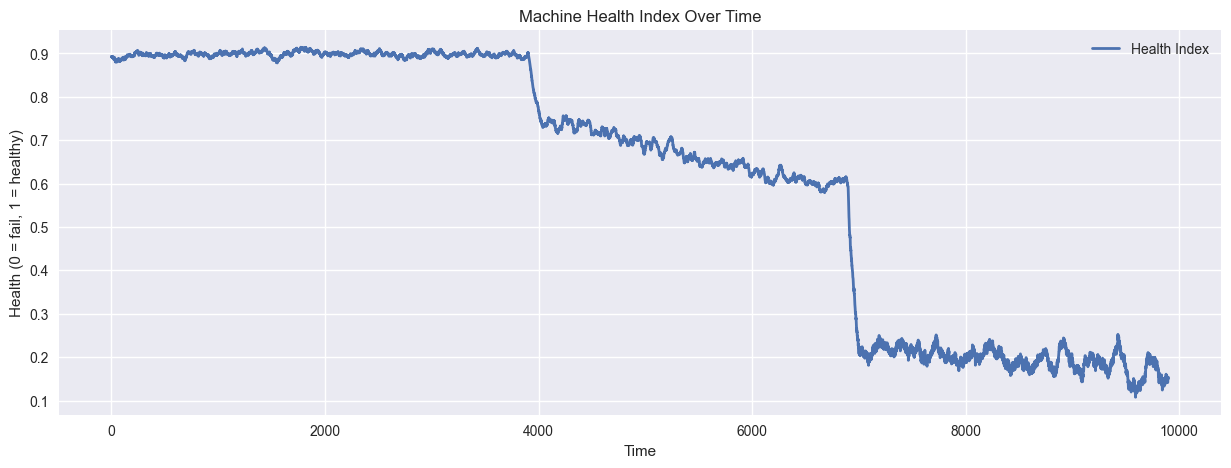

In [41]:
plt.figure(figsize=(15,5))
plt.plot(health_index, label='Health Index', linewidth=2)
plt.xlabel("Time")
plt.ylabel("Health (0 = fail, 1 = healthy)")
plt.title("Machine Health Index Over Time")
plt.grid(True)
plt.legend()
plt.show()


In [42]:
# Predict failure probability for each time window
failure_prob = fusion_model.predict_proba(fusion_features)[:, 1]

print("Failure probability shape:", failure_prob.shape)
print("Example values:", failure_prob[:10])


Failure probability shape: (9900,)
Example values: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


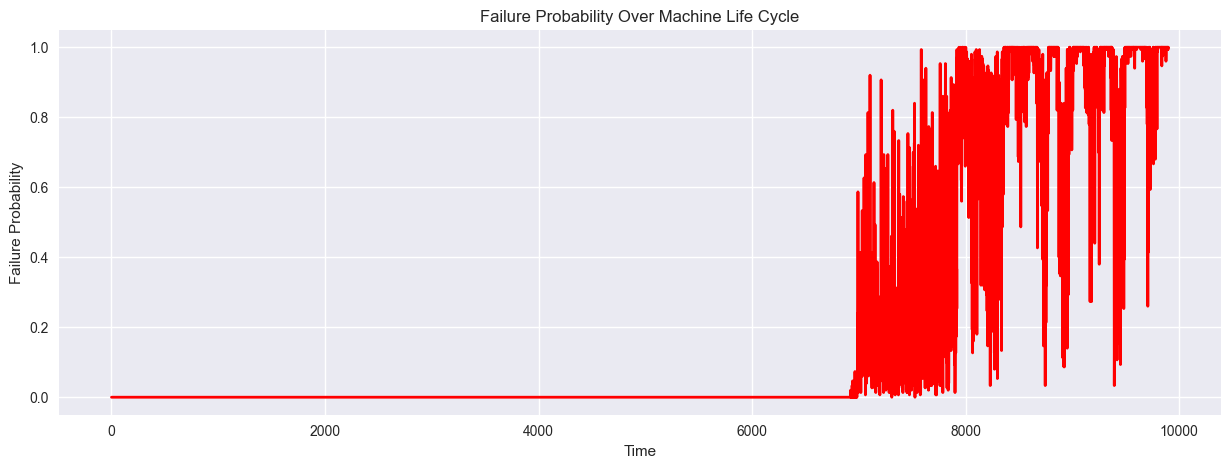

In [43]:
plt.figure(figsize=(15,5))
plt.plot(failure_prob, color='red', linewidth=2)
plt.xlabel("Time")
plt.ylabel("Failure Probability")
plt.title("Failure Probability Over Machine Life Cycle")
plt.grid(True)
plt.show()


In [44]:
failure_prob[-20:]


array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.99333333, 1.        , 1.        ,
       1.        , 0.99333333, 1.        , 1.        , 1.        ,
       1.        , 0.99333333, 1.        , 1.        , 1.        ])

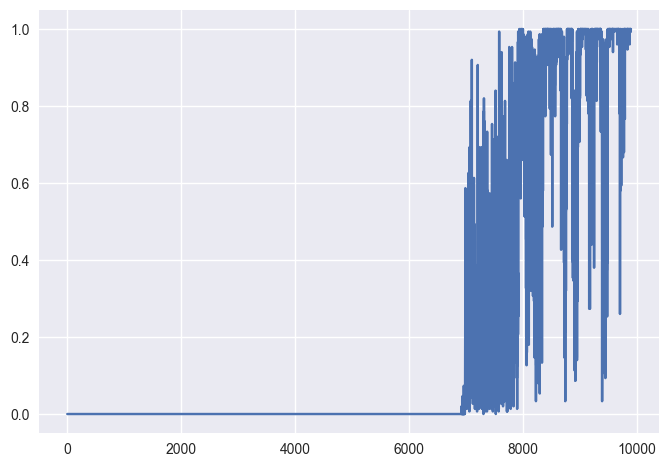

In [45]:
plt.plot(failure_prob)


In [46]:
dashboard_df = pd.DataFrame({
    "time": np.arange(len(health_index)),
    "vibration": df["vibration"].values[:len(health_index)],
    "temperature": df["temperature"].values[:len(health_index)],
    "pressure": df["pressure"].values[:len(health_index)],
    "torque": df["torque"].values[:len(health_index)],
    "current": df["current"].values[:len(health_index)],
    "rpm": df["rpm"].values[:len(health_index)],
    "anomaly_score": reconstruction_error,
    "rul_prediction": rul_pred[:len(health_index)],
    "failure_probability": failure_prob,
    "health_index": health_index
})

dashboard_df.head()


,time,vibration,temperature,pressure,torque,current,rpm,anomaly_score,rul_prediction,failure_probability,health_index
0,0,0.267801,40.386572,98.539032,49.222044,9.770518,1499.295226,0.165468,8266.995117,0.0,0.892974
1,1,0.359893,40.455069,98.492908,49.736141,9.703216,1497.984546,0.165673,8267.842773,0.0,0.892350
2,2,0.304508,39.466202,100.492843,48.858534,9.916237,1499.796474,0.165609,8263.777344,0.0,0.892354
3,3,0.310607,39.575341,97.636166,50.644588,9.743683,1503.658847,0.165567,8274.817383,0.0,0.893047
4,4,0.301429,40.829007,100.976593,50.151828,10.249024,1506.212530,0.166052,8270.619141,0.0,0.891259


In [47]:
autoencoder.save("../models/autoencoder_model")
lstm_rul.save("../models/lstm_rul_model")

import pickle
with open("../models/fusion_model.pkl", "wb") as f:
    pickle.dump(fusion_model, f)

with open("../models/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


INFO:tensorflow:Assets written to: ../models/autoencoder_model\assets


INFO:tensorflow:Assets written to: ../models/autoencoder_model\assets


INFO:tensorflow:Assets written to: ../models/lstm_rul_model\assets


INFO:tensorflow:Assets written to: ../models/lstm_rul_model\assets


In [48]:
dashboard_df.to_csv("../data/raw/dashboard_dataset.csv", index=False)
print("Dashboard dataset saved!")


Dashboard dataset saved!
